#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

# for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns


#### Importing Dataset

In [2]:
purchase_data = pd.read_csv('QVI_purchase_behaviour.csv')
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## Data Exploration

In [4]:
# Basic Information of dataset(QVI_purchase_behaviour)
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
# Basic Information of dataset(QVI_transaction_data)
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
# Statistical Summary of QVI_purchase_behaviour data
purchase_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [7]:
# Statistical Summary of QVI_transaction_data data
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


#### Checking missing values

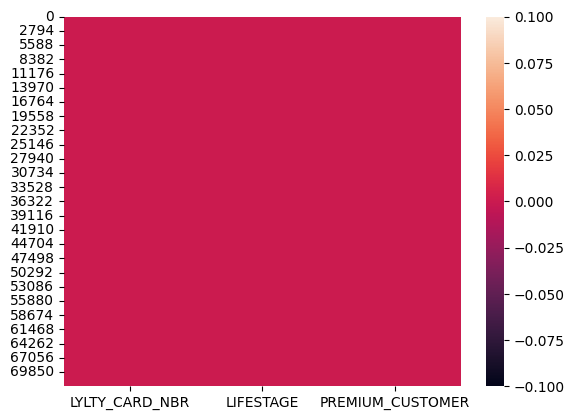

In [8]:
### Checking missing values of QVI_purchase_behaviour data
sns.heatmap(purchase_data.isnull())
plt.show()

In [10]:
purchase_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

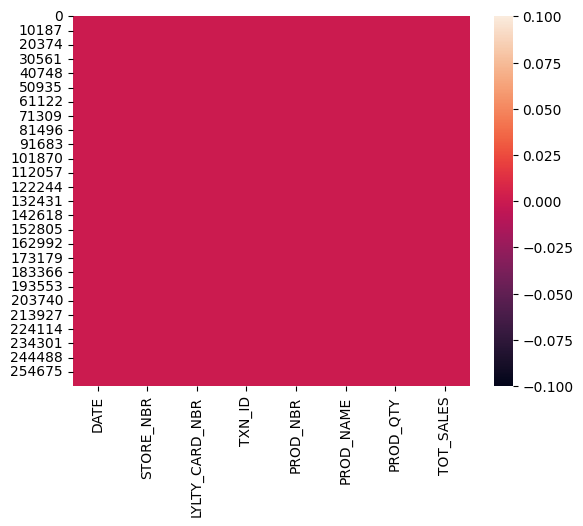

In [11]:
### Checking missing values of QVI_transaction_data
sns.heatmap(transaction_data.isnull())
plt.show()

In [12]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

#### Analyzing and Removing Outliers

In [13]:
Q1 = transaction_data['TOT_SALES'].quantile(0.25)
Q3 = transaction_data['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
filtered_data = transaction_data[(transaction_data['TOT_SALES'] >= Q1 - 1.5 * IQR) & 
                                  (transaction_data['TOT_SALES'] <= Q3 + 1.5 * IQR)]


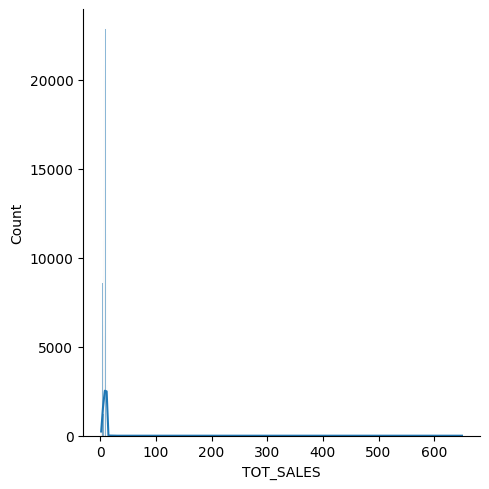

In [14]:
sns.displot(transaction_data['TOT_SALES'], kde=True)

#### Date column is not in proper format. so, date column should be datetime format

In [15]:
transaction_data['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(transaction_data['DATE'], unit='D')

In [16]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Analyzing the product name column (PROD_NAME) to make sure all items are chips

In [17]:
transaction_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [18]:
# Remove extra whitespaces and strip leading/trailing spaces
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace(r'\s+', ' ', regex=True).str.strip()


In [19]:
transaction_data['PROD_NAME'].unique()

array(['Natural Chip Compny SeaSalt175g', 'CCs Nacho Cheese 175g',
       'Smiths Crinkle Cut Chips Chicken 170g',
       'Smiths Chip Thinly S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour Cream&Chives 210G',
       'Kettle Sensations Siracha Lime 150g', 'Twisties Cheese 270g',
       'WW Crinkle Cut Chicken 175g', 'Thins Chips Light& Tangy 175g',
       'CCs Original 175g', 'Burger Rings 220g',
       'NCC Sour Cream & Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt And Vinegar 175g',
       'Smiths Chip Thinly Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai Chilli&L

In [20]:
transaction_data['PROD_NAME'].value_counts()


PROD_NAME
Kettle Mozzarella Basil & Pesto 175g        3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps Ched & Chives 165g          3268
Cobs Popd Sea Salt Chips 110g               3265
                                            ... 
RRD Pc Sea Salt 165g                        1431
Woolworths Medium Salsa 300g                1430
NCC Sour Cream & Garden Chives 175g         1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut Original 175g                1410
Name: count, Length: 114, dtype: int64